**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

**Loading Datasets**

In [2]:
data_2019 = pd.read_csv('2019-20.csv')
data_2020 = pd.read_csv('2020-21.csv')

In [3]:
data_2019.drop(columns=['Match Report', 'Notes'], inplace= True)
data_2020.drop(columns=['Match Report', 'Notes'], inplace= True)
data_2020.drop(data_2020.tail(3).index,inplace=True)

data_2019["GF"].astype(str).astype(int)
data_2019["GA"].astype(str).astype(int)
data_2020["GF"].astype(str).astype(float).astype(int)
data_2020["GA"].astype(str).astype(float).astype(int)

def map_formations(row):
    if row['Formation'] == '03/04/2003':
        return '3-4-3'
    elif row['Formation'] == '04/04/2002':
        return '4-4-2'
    else:
        return row['Formation']
data_2019["Formation"] = data_2019.apply(lambda row: map_formations(row), axis=1)

print("Data Cleaning Complete")

Data Cleaning Complete


In [4]:
data_2020.head(3)

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee
0,19/09/2020,17:30 (21:30),Premier League,Matchweek 2,Sat,Home,L,1.0,3.0,Crystal Palace,1.1,1.6,75.0,NaN,Harry Maguire,4-2-3-1,Martin Atkinson
1,22/09/2020,20:15 (00:15),EFL Cup,Third round,Tue,Away,W,3.0,0.0,Luton Town,NaN,NaN,58.0,NaN,Harry Maguire,4-2-3-1,Tim Robinson
2,26/09/2020,12:30 (16:30),Premier League,Matchweek 3,Sat,Away,W,3.0,2.0,Brighton,1.1,2.4,46.0,NaN,Harry Maguire,4-2-3-1,Chris Kavanagh


###**Season Summary**

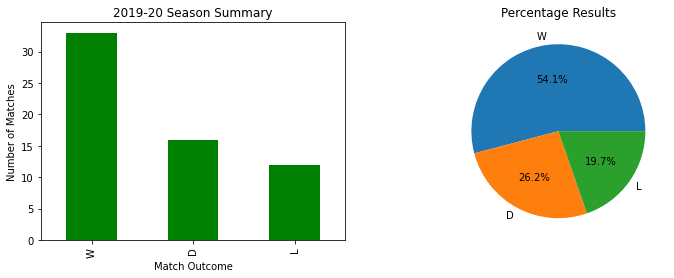

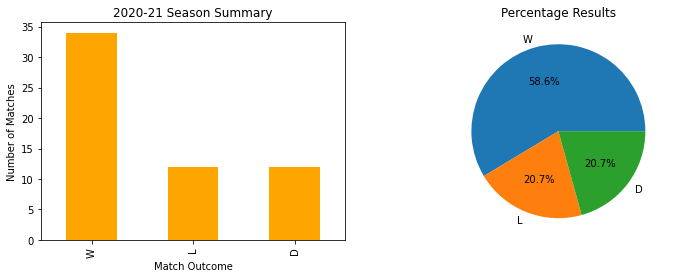



Goals Scored in 2019-20: 112
Goals Conceded in 2019-20: 51
Goals Scored in 2020-21: 117
Goals Conceded in 2020-21: 65


In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
data_2019['Result'].value_counts().plot.bar(color = 'green')
plt.title("2019-20 Season Summary")
plt.xlabel("Match Outcome")
plt.ylabel("Number of Matches")

plt.subplot(1, 2, 2)
ax = data_2019['Result'].value_counts()
ax.plot.pie(subplots=True,autopct="%.1f%%")
plt.title('Percentage Results')
plt.ylabel('')
plt.show()

print("\n")

plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
data_2020['Result'].value_counts().plot.bar(color = 'orange')
plt.title("2020-21 Season Summary")
plt.xlabel("Match Outcome")
plt.ylabel("Number of Matches")

plt.subplot(1, 2, 2)
ax = data_2020['Result'].value_counts()
ax.plot.pie(subplots=True,autopct="%.1f%%")
plt.title('Percentage Results')
plt.ylabel('')
plt.show()

print("\n")
print("Goals Scored in 2019-20:", data_2019["GF"].sum(axis = 0, skipna = True))
print("Goals Conceded in 2019-20:", data_2019["GA"].sum(axis = 0, skipna = True))
print("Goals Scored in 2020-21:", int(data_2020["GF"].sum(axis = 0, skipna = True)))
print("Goals Conceded in 2020-21:", int(data_2020["GA"].sum(axis = 0, skipna = True)))

### **Formation Analysis**

In [ ]:
print("Season 2019-20")
print(data_2019['Formation'].value_counts())
print("\n")
print("Season 2020-21")
print(data_2020['Formation'].value_counts())

Season 2019-20
4-2-3-1    49
3-4-1-2     8
3-4-3       3
4-4-2       1
Name: Formation, dtype: int64


Season 2020-21
4-2-3-1    50
4-4-2       4
3-4-1-2     2
4-3-1-2     1
4-4-1-1     1
Name: Formation, dtype: int64


**Most used Formation**

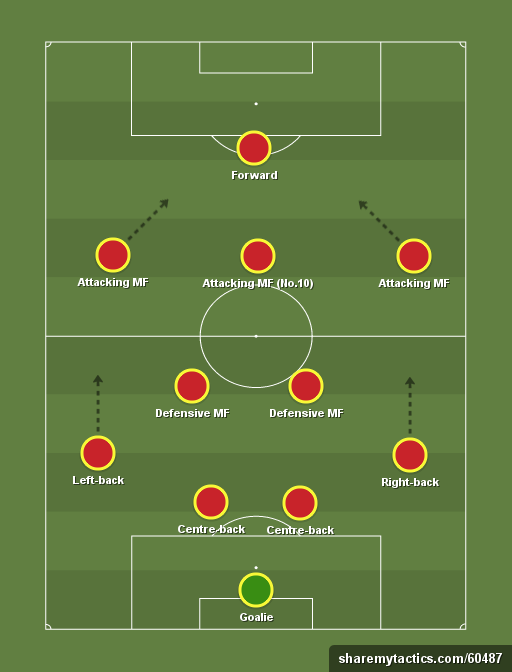

Proportion of Results for each Formation in 2019


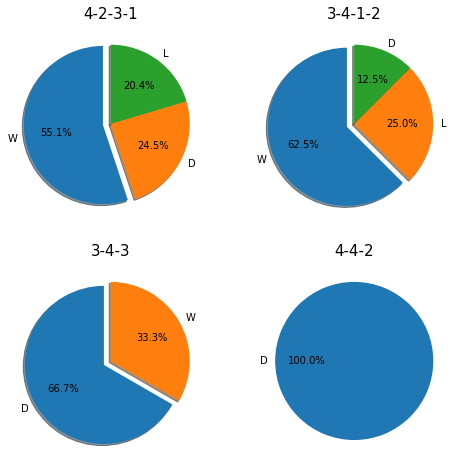



In which games was a change of Formation requred?


,Comp,Opponent,Formation,Result,GF,GA
11,Premier League,Liverpool,3-4-1-2,D,1,1
14,EFL Cup,Chelsea,3-4-1-2,W,2,1
34,Premier League,Liverpool,3-4-1-2,L,0,2
36,FA Cup,Tranmere Rovers,3-4-1-2,W,6,0
37,EFL Cup,Manchester City,3-4-1-2,W,1,0
39,Premier League,Chelsea,3-4-1-2,W,2,0
45,Premier League,Manchester City,3-4-1-2,W,2,0
55,FA Cup,Chelsea,3-4-1-2,L,1,3
12,Europa Lg,Partizan,3-4-3,W,1,0
18,Premier League,Sheffield Utd,3-4-3,D,3,3


In [16]:
print("Proportion of Results for each Formation in 2019")
plt.figure(figsize=(8,8))

explode = (0.1, 0, 0)
plt.subplot(2, 2, 1)
ax = data_2019[data_2019['Formation'] == "4-2-3-1"]['Result'].value_counts()
ax.plot.pie(subplots=True,autopct="%.1f%%", explode=explode, shadow=True, startangle=90)
plt.title('4-2-3-1', fontsize=15)
plt.ylabel('')

plt.subplot(2, 2, 2)
ax = data_2019[data_2019['Formation'] == "3-4-1-2"]['Result'].value_counts()
ax.plot.pie(subplots=True,autopct="%.1f%%", explode=explode, shadow=True, startangle=90)
plt.title('3-4-1-2', fontsize=15)
plt.ylabel('')

explode = (0.1, 0)
plt.subplot(2, 2, 3)
ax = data_2019[data_2019['Formation'] == "3-4-3"]['Result'].value_counts()
ax.plot.pie(subplots=True,autopct="%.1f%%", explode=explode, shadow=True, startangle=90)
plt.title('3-4-3', fontsize=15)
plt.ylabel('')

explode = (0.1, 0, 0)
plt.subplot(2, 2, 4)
ax = data_2019[data_2019['Formation'] == "4-4-2"]['Result'].value_counts()
ax.plot.pie(subplots=True,autopct="%.1f%%")
plt.title('4-4-2', fontsize=15)
plt.ylabel('')

plt.show()

print("\n")
print("In which games was a change of Formation required?")
data_2019[data_2019["Formation"] != "4-2-3-1"].loc[:, ["Comp", "Opponent", "Formation", "Result", "GF", "GA"]].sort_values("Formation")

3-4-1-2 was played in most of the important games and against stronger opponents such as Chelsea, Liverpool, and Man City. <br>
On the other hand, 3-4-3 was played against weaker opponents. 

Proportion of Results for each Formation in 2020


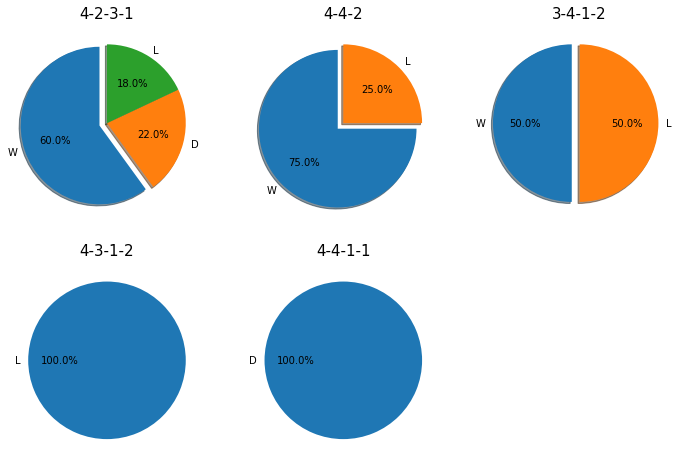



In which games was a change of Formation requred?


,Comp,Opponent,Formation,Result,GF,GA
6,Champions Lg,PSG,3-4-1-2,W,2.0,1.0
17,Champions Lg,RB Leipzig,3-4-1-2,L,2.0,3.0
25,EFL Cup,Manchester City,4-3-1-2,L,0.0,2.0
43,Europa Lg,Milan,4-4-1-1,D,1.0,1.0
8,Champions Lg,RB Leipzig,4-4-2,W,5.0,0.0
9,Premier League,Arsenal,4-4-2,L,0.0,1.0
14,Premier League,Southampton,4-4-2,W,3.0,2.0
24,Premier League,Aston Villa,4-4-2,W,2.0,1.0


In [18]:
print("Proportion of Results for each Formation in 2020")

plt.figure(figsize=(12,8))
explode = (0.1, 0, 0)

plt.subplot(2, 3, 1)
ax = data_2020[data_2020['Formation'] == "4-2-3-1"]['Result'].value_counts()
ax.plot.pie(subplots=True,autopct="%.1f%%", explode=explode, shadow=True, startangle=90)
plt.title('4-2-3-1', fontsize=15)
plt.ylabel('')


explode = (0.1, 0)
plt.subplot(2, 3, 2)
ax = data_2020[data_2020['Formation'] == "4-4-2"]['Result'].value_counts()
ax.plot.pie(subplots=True,autopct="%.1f%%", explode=explode, shadow=True, startangle=90)
plt.title('4-4-2', fontsize=15)
plt.ylabel('')

plt.subplot(2, 3, 3)
ax = data_2020[data_2020['Formation'] == "3-4-1-2"]['Result'].value_counts()
ax.plot.pie(subplots=True,autopct="%.1f%%", explode=explode, shadow=True, startangle=90)
plt.title('3-4-1-2', fontsize=15)
plt.ylabel('')

plt.subplot(2, 3, 4)
ax = data_2020[data_2020['Formation'] == "4-3-1-2"]['Result'].value_counts()
ax.plot.pie(subplots=True,autopct="%.1f%%")
plt.title('4-3-1-2', fontsize=15)
plt.ylabel('')

plt.subplot(2, 3, 5)
ax = data_2020[data_2020['Formation'] == "4-4-1-1"]['Result'].value_counts()
ax.plot.pie(subplots=True,autopct="%.1f%%")
plt.title('4-4-1-1', fontsize=15)
plt.ylabel('')

plt.show()

print("\n")
print("In which games was a change of Formation required?")
data_2020[data_2020["Formation"] != "4-2-3-1"].loc[:, ["Comp", "Opponent", "Formation", "Result", "GF", "GA"]].sort_values("Formation")

Changing formations was generally used when playing against stronger opponents. Here we see that a different formation was used against PSG, Leipzig, Man City, Milan, and Arsenal.

In [27]:
subset_2019 = data_2019[data_2019["Formation"] != "4-2-3-1"].loc[:, ["Comp", "Opponent", "Formation", "Result", "GF", "GA"]].sort_values("Formation")
subset_2020 = data_2020[data_2020["Formation"] != "4-2-3-1"].loc[:, ["Comp", "Opponent", "Formation", "Result", "GF", "GA"]].sort_values("Formation")
combined = pd.concat([data_2019, data_2020]).loc[:, ["Comp", "Opponent", "Formation", "Result", "GF", "GA"]].sort_values("Formation")
combined

,Comp,Opponent,Formation,Result,GF,GA
34,Premier League,Liverpool,3-4-1-2,L,0.0,2.0
17,Champions Lg,RB Leipzig,3-4-1-2,L,2.0,3.0
36,FA Cup,Tranmere Rovers,3-4-1-2,W,6.0,0.0
55,FA Cup,Chelsea,3-4-1-2,L,1.0,3.0
6,Champions Lg,PSG,3-4-1-2,W,2.0,1.0
...,...,...,...,...,...,...
14,Premier League,Southampton,4-4-2,W,3.0,2.0
43,Premier League,Everton,4-4-2,D,1.0,1.0
9,Premier League,Arsenal,4-4-2,L,0.0,1.0
8,Champions Lg,RB Leipzig,4-4-2,W,5.0,0.0


**Analyzing Overall Success of the Major Formations Used**

Text(0, 0.5, '')

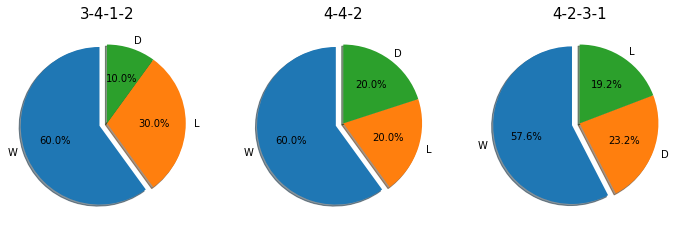

In [28]:
plt.figure(figsize=(12,8))
explode = (0.1, 0, 0)

plt.subplot(1, 3, 1)
ax = combined[combined['Formation'] == "3-4-1-2"]['Result'].value_counts()
ax.plot.pie(subplots=True,autopct="%.1f%%", explode=explode, shadow=True, startangle=90)
plt.title('3-4-1-2', fontsize=15)
plt.ylabel('')

plt.subplot(1, 3, 2)
ax = combined[combined['Formation'] == "4-4-2"]['Result'].value_counts()
ax.plot.pie(subplots=True,autopct="%.1f%%", explode=explode, shadow=True, startangle=90)
plt.title('4-4-2', fontsize=15)
plt.ylabel('')

plt.subplot(1, 3, 3)
ax = combined[combined['Formation'] == "4-2-3-1"]['Result'].value_counts()
ax.plot.pie(subplots=True,autopct="%.1f%%", explode=explode, shadow=True, startangle=90)
plt.title('4-2-3-1', fontsize=15)
plt.ylabel('')